In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf


from tensorflow.keras.datasets import mnist

/home/admin-pc/.virtualenvs/cv2_python3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

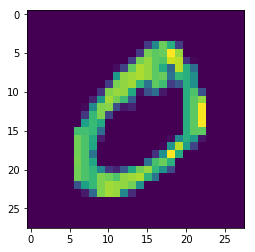

In [19]:
plt.imshow(x_train[1])
y_train

In [29]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [30]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 25s - loss: 0.6961 - acc: 0.7895    
Epoch 2/10
60000/60000 [==============================] - 24s - loss: 0.2596 - acc: 0.9229    
Epoch 3/10
60000/60000 [==============================] - 23s - loss: 0.1877 - acc: 0.9436    
Epoch 4/10
60000/60000 [==============================] - 23s - loss: 0.1499 - acc: 0.9544    
Epoch 5/10
60000/60000 [==============================] - 22s - loss: 0.1287 - acc: 0.9615    
Epoch 6/10
60000/60000 [==============================] - 22s - loss: 0.1147 - acc: 0.9653    
Epoch 7/10
60000/60000 [==============================] - 22s - loss: 0.1017 - acc: 0.9687    
Epoch 8/10
60000/60000 [==============================] - 22s - loss: 0.0951 - acc: 0.9708    
Epoch 9/10
60000/60000 [==============================] - 22s - loss: 0.0857 - acc: 0.9735    
Epoch 10/10
60000/60000 [==============================] - 22s - loss: 0.0814 - acc: 0.9752    


In [33]:
model.evaluate(x_test, y_test)


 9824/10000 [============================>.] - ETA: 0s

[0.07998042597640306, 0.9755]

3


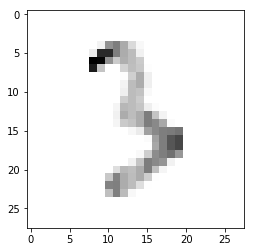

In [47]:
image_index = 44
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
reshaped_img = x_test[image_index].reshape(1, 28, 28, 1)
pred = model.predict(reshaped_img)
print(pred.argmax())

In [48]:
model.save('cnn_TR60000_number_reader.model')

In [49]:
new_model = tf.keras.models.load_model('cnn_TR60000_number_reader.model')

In [51]:
new_model.predict(reshaped_img).argmax()

3

In [52]:
import cv2


In [64]:
img = cv2.imread('/home/admin-pc/Downloads/20b53d68-175e-4f73-b4e4-d50b392c2088.bmp', 0)
img = cv2.resize(img, (28, 28))

In [66]:
img.shape

(28, 28)

In [69]:
x_test[image_index].shape

(28, 28, 1)

In [72]:
model.predict(img.reshape(1, 28, 28, 1)).argmax()


3

In [73]:
input_shape

(28, 28, 1)